<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio: Construcción Modelo de Clasificación y Evaluación de Métricas

Tras realizar el preprocesamiento de los datos y dejarlos listos para construir modelos, ha llegado el momento de dar el siguiente paso: desarrollar tu **primer modelo de clasificación**.

El objetivo de este laboratorio es implementar un modelo de clasificación inicial utilizando **Regresión Logística (Logistic Regression)**. Este modelo te permitirá obtener las primeras predicciones para identificar transacciones normales y anómalas, así como evaluar su desempeño utilizando métricas estándar.

Además, deberás evaluar si el modelo está en riesgo de **overfitting**, asegurando que nuestras predicciones sean consistentes tanto en los datos de entrenamiento como en los de prueba.


## Objetivo del Laboratorio

1. Entrenar un modelo de **Regresión Logística** para predecir si una transacción es "Normal" o "Anómala".

2. Evaluar el desempeño del modelo utilizando métricas como:

   - Precisión (Accuracy).

   - Matriz de confusión.

   - Precisión (Precision), exhaustividad (Recall) y F1-Score.

   - Área bajo la curva ROC (AUC-ROC).

3. Determinar si el modelo presenta **overfitting** o **underfitting**, analizando el rendimiento en los datos de entrenamiento y prueba.


In [30]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)

import support_modeling as sp  

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [31]:
df=pd.read_csv("../results/data_encoded.csv")
df

,is_fraudulent,amount_minmax,customer_age_minmax,card_type_Discover,card_type_MasterCard,card_type_Visa,purchase_category_Groceries,purchase_category_Online Shopping,purchase_category_Restaurant,purchase_category_Retail,purchase_category_Travel
0,0,0.575423,0.480769,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.189301,0.826923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,0.123960,0.750000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.761671,0.788462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.188153,0.346154,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9982,1,0.893437,0.346154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9983,0,0.001956,0.461538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9984,0,0.632990,0.346154,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9985,1,0.282959,0.750000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [32]:
df["is_fraudulent"]=df["is_fraudulent"].astype(float)

In [33]:
vr="is_fraudulent"
modelo = sp.AnalisisModelosClasificacion(df, vr)

In [34]:
modelo_elegido="gradient_boosting"

In [35]:
modelo.ajustar_modelo(modelo_elegido)

In [36]:
modelo.calcular_metricas(modelo_elegido)

,train,test
accuracy,0.747903,0.502503
precision,0.747897,0.502089
recall,0.747903,0.502503
f1,0.747897,0.502167
kappa,0.495731,0.003499
auc,0.831833,0.499097


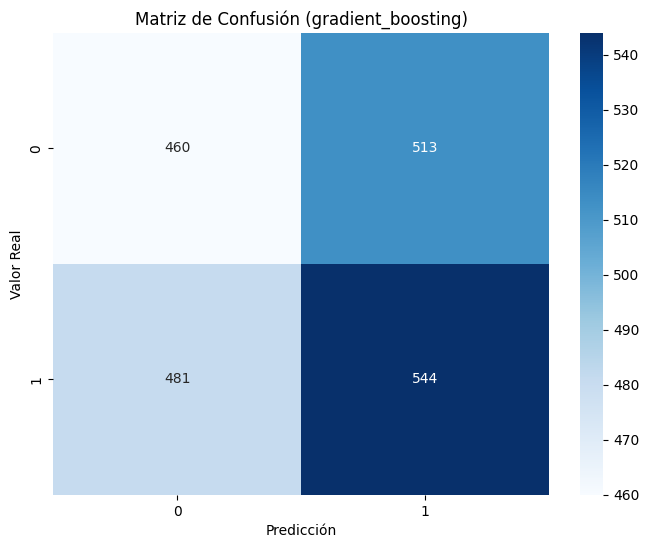

In [37]:
modelo.plot_matriz_confusion(modelo_elegido)

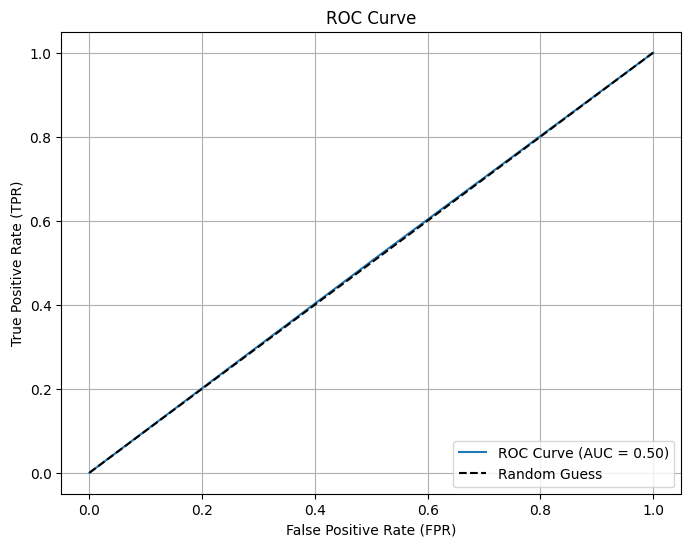

In [38]:
modelo.hacer_roc_curve(modelo_elegido)

c:\Users\alexc\Desktop\GIT\9.1.Preprocesamiento_vr_categorica\notebooks\../src\support_modeling.py:213: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


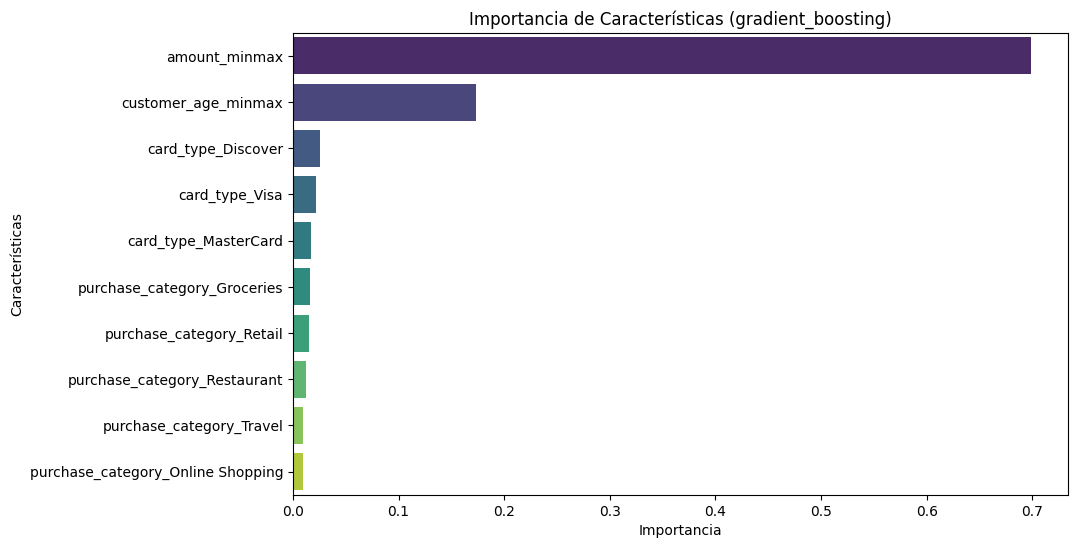

In [39]:
modelo.importancia_predictores(modelo_elegido)